# MODELO SESGADO [no es la notebook final]

In [ ]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier #arbol de decisiones
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

from sklearn import metrics

from sklearn.model_selection import train_test_split #particionar datos para entrenamiento y test
from sklearn.model_selection import cross_val_score #cross validation

from sklearn.metrics import confusion_matrix #matriz de confusion
from sklearn.metrics import plot_confusion_matrix #graficar matriz de confusion
#from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.metrics import classification_report, plot_roc_curve
from sklearn.metrics import PrecisionRecallDisplay




In [ ]:
#import sys
#!{sys.executable} -m pip install --upgrade scikit-learn

In [ ]:
df =  pd.read_csv('Google-Playstore.csv')

In [ ]:
#columnas del dataset
#df.dtypes

In [ ]:
df.loc[:5, ['App Name', 'Installs','Minimum Installs','Maximum Installs','Content Rating','Price', 'Minimum Android']]

,App Name,Installs,Minimum Installs,Maximum Installs,Content Rating,Price,Minimum Android
0,Gakondo,10+,10.0,15,Everyone,0.0,7.1 and up
1,Ampere Battery Info,"5,000+",5000.0,7662,Everyone,0.0,5.0 and up
2,Vibook,50+,50.0,58,Everyone,0.0,4.0.3 and up
3,Smart City Trichy Public Service Vehicles 17UC...,10+,10.0,19,Everyone,0.0,4.0.3 and up
4,GROW.me,100+,100.0,478,Everyone,0.0,4.1 and up
5,IMOCCI,50+,50.0,89,Teen,0.0,6.0 and up


In [ ]:
#eliminar duplicados 
apps = df.copy()
apps = apps.drop_duplicates()


In [ ]:
#visualizar nulos
apps.isnull().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [ ]:
#nos interesan las columnas Category, Minimum Installs, Rating, Content Rating por lo que no deben contener nulos
#eliminar nulos

apps = apps.drop(apps[apps['Category'].isnull()].index, axis=0)
apps = apps.drop(apps[apps['Minimum Installs'].isnull()].index, axis=0)
apps = apps.drop(apps[apps['Rating'].isnull()].index, axis=0)
apps = apps.drop(apps[apps['Content Rating'].isnull()].index, axis=0)
apps = apps.drop(apps[apps['Rating Count'].isnull()].index, axis=0)
apps = apps.drop(apps[apps['Free'].isnull()].index, axis=0)
apps = apps.drop(apps[apps['In App Purchases'].isnull()].index, axis=0)
apps = apps.drop(apps[apps['Ad Supported'].isnull()].index, axis=0)

apps.isnull().sum()

App Name                  2
App Id                    0
Category                  0
Rating                    0
Rating Count              0
Installs                  0
Minimum Installs          0
Maximum Installs          0
Free                      0
Price                     0
Currency                 20
Size                      0
Minimum Android        6526
Developer Id             32
Developer Website    751360
Developer Email          31
Released              48378
Last Updated              0
Content Rating            0
Privacy Policy       414198
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [ ]:
#minimum installs es la cota inferior y es del tipo float64
#maximum installs es el nro real de instalaciones (varia mucho para usarlo en el entranamiento del modelo)

#ordenar app por nro de instalaciones
vista = apps.sort_values(by="Minimum Installs",ascending=False)
vista.reset_index(inplace=True)
vista.drop(["index"],axis=1,inplace=True)


In [ ]:
vista.loc[:10, ['App Name', 'Category','Rating', 'Content Rating', 'Minimum Installs']]


,App Name,Category,Rating,Content Rating,Minimum Installs
0,Google Play services,Tools,4.2,Everyone,1.000000e+10
1,Google,Tools,4.2,Everyone,5.000000e+09
2,YouTube,Video Players & Editors,4.4,Teen,5.000000e+09
3,Android Accessibility Suite,Tools,4.2,Everyone,5.000000e+09
4,Gmail,Communication,4.2,Everyone,5.000000e+09
5,Messenger – Text and Video Chat for Free,Communication,4.0,Everyone,5.000000e+09
6,Google Photos,Photography,4.5,Everyone,5.000000e+09
7,Facebook,Social,2.3,Teen,5.000000e+09
8,Google Drive,Productivity,4.3,Everyone,5.000000e+09
9,Hangouts,Communication,4.0,Everyone,5.000000e+09


In [ ]:
vista.tail()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
2290056,Tim Coiffure,fr.timcoiffure.androidoverview,Beauty,0.0,0.0,0+,0.0,0,True,0.0,...,http://créating.com,arcencielnumerique@gmail.com,"May 21, 2018","May 21, 2018",Everyone,https://timcoiffure.fr/application/privacypoli...,False,False,False,2021-06-16 09:29:58
2290057,Estonian-Tamil Translator,com.hbs.translator.estonian.ta,Books & Reference,0.0,0.0,0+,0.0,0,True,0.0,...,NaN,hbs.apps@ya.ru,"Jul 4, 2018","Jul 04, 2018",Everyone,http://translator-arabic-tamil-ta.android-apps...,True,False,False,2021-06-15 23:10:34
2290058,The Memorial Day,com.memorial.hatem97,Events,0.0,0.0,0+,0.0,0,True,0.0,...,https://10994.appads-txt.com/ads-app.txt,hatem.amm.manasreh@gmail.com,"May 31, 2021","Jun 01, 2021",Everyone,NaN,True,False,False,2021-06-16 06:44:09
2290059,Towy Provider,com.towy.providers,Travel & Local,0.0,0.0,0+,0.0,0,True,0.0,...,https://towy.co.ke/,jubaride@gmail.com,"May 24, 2021","May 26, 2021",Everyone,https://towy.flycricket.io/privacy.html,False,False,False,2021-06-15 23:43:09
2290060,JFV Rhume-Oder,com.tickaroo.enterprise.android775209389973782...,Sports,0.0,0.0,0+,0.0,0,True,0.0,...,NaN,amateure@kicker.de,"Mar 12, 2020","Jun 10, 2021",Everyone,http://www.kicker.de/home/513381/datenschutzhi...,True,False,False,2021-06-16 11:48:33


In [ ]:
Apps = apps.copy()
#Apps.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [ ]:
#particion
X = Apps.filter(['Category','Content Rating','Free','In App Purchases', 'Ad Supported', 'Rating Count'], axis=1)


X.head()

,Category,Content Rating,Rating Count,Free,In App Purchases,Ad Supported
0,Adventure,Everyone,0.0,True,False,False
1,Tools,Everyone,64.0,True,False,True
2,Productivity,Everyone,0.0,True,False,False
3,Communication,Everyone,5.0,True,False,True
4,Tools,Everyone,0.0,True,False,False


In [ ]:
X.dtypes

Category             object
Content Rating       object
Rating Count        float64
Free                   bool
In App Purchases       bool
Ad Supported           bool
dtype: object

In [ ]:
X_encoded = pd.get_dummies(X, columns=['Category','Content Rating', 'Free','In App Purchases', 'Ad Supported'])
#X_encoded.drop

X_encoded.head()

,Rating Count,Category_Action,Category_Adventure,Category_Arcade,Category_Art & Design,Category_Auto & Vehicles,Category_Beauty,Category_Board,Category_Books & Reference,Category_Business,...,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Free_False,Free_True,In App Purchases_False,In App Purchases_True,Ad Supported_False,Ad Supported_True
0,0.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,64.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3,5.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0


###### Se busca clasificar las apps en exitosas o no exitosas. En el dataset, son consideradas exitosas las apps con descargas mayores o iguales a 1000 y calificacion mayor o igual a 3.5

In [ ]:
y = Apps.filter(['Rating', 'Minimum Installs'], axis=1)

#aplicaciones mayor o igual a 1000 instlaciones y calificacion mayor o igual a 3.5
y.Rating = ( (y['Minimum Installs'] >=1000) & ( y['Rating']>= 3.5 ) )*1
y = y.drop(columns = ['Minimum Installs'])

y = y.rename(columns={'Rating': 'objetivo'})
y


,objetivo
0,0
1,1
2,0
3,0
4,0
...,...
2312939,1
2312940,0
2312941,0
2312942,1


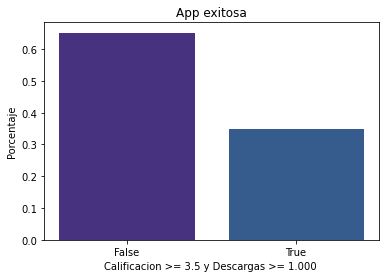

In [ ]:
plt.bar(['False', 'True'], y['objetivo'].value_counts(normalize=True),
        color=sns.color_palette("viridis"))
plt.title('App exitosa')
plt.ylabel('Porcentaje')
plt.xlabel('Calificacion >= 3.5 y Descargas >= 1.000 ')
plt.show();


In [ ]:
y.value_counts()

objetivo
0           1492853
1            797208
dtype: int64

# Modelos de clasificación


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, test_size=.2)

In [ ]:
#arbol de decision
arbol_pre = DecisionTreeClassifier(random_state=42)
arbol_pre = arbol_pre.fit(X_train, y_train)


In [ ]:
#arbol de decision con altura 4 - prueba
arbol_2 = DecisionTreeClassifier(random_state=42, max_depth=4)
arbol_2 = arbol_2.fit(X_train, y_train)


In [ ]:
#ramdom forest
#cuantos menos estimadores, mas rapido termina...
#parametros de la documentacion...
rf = RandomForestClassifier(n_estimators=20, verbose=3, max_depth=4, max_samples=0.2, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train.values.ravel())

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 20building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20building tree 8 of 20


building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:    2.2s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.0s finished


RandomForestClassifier(max_depth=4, max_samples=0.2, n_estimators=20, n_jobs=-1,
                       random_state=42, verbose=3)

In [ ]:
#naive bayes
gnb = GaussianNB()
gnb.fit(X_train,y_train.values.ravel())
#predicted = gnb.predict(X_test)

GaussianNB()

# Metricas

### Decision Tree

In [ ]:
y_prediccion = arbol_pre.predict(X_test)
print('DecisionTreeClassifier')
print("Accuracy : " ,accuracy_score(y_true = y_test, y_pred = y_prediccion)*100)
print("Precision: " ,precision_score(y_true = y_test, y_pred = y_prediccion)*100)
print("Recall: " ,recall_score(y_true = y_test, y_pred = y_prediccion)*100)



DecisionTreeClassifier
Accuracy :  85.10500793645596
Precision:  77.66669701660142
Recall:  80.28108922073032


### Random Forest

In [ ]:
y_prediccion = rf.predict(X_test)
print('Random Forest')
print("Accuracy : " ,accuracy_score(y_true = y_test, y_pred = y_prediccion)*100)
print("Precision: " ,precision_score(y_true = y_test, y_pred = y_prediccion)*100)
print("Recall: " ,recall_score(y_true = y_test, y_pred = y_prediccion)*100)



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.1s finished


Random Forest
Accuracy :  81.57432212622786
Precision:  81.07718321066241
Recall:  61.374074538837995


### Gaussian Naive Bayes

In [ ]:
y_prediccion = gnb.predict(X_test)
print('Gaussian Naive Bayes')
print("Accuracy : " ,accuracy_score(y_true = y_test, y_pred = y_prediccion)*100)
print("Precision: " ,precision_score(y_true = y_test, y_pred = y_prediccion)*100)
print("Recall: " ,recall_score(y_true = y_test, y_pred = y_prediccion)*100)



Gaussian Naive Bayes
Accuracy :  65.35273016268097
Precision:  99.00709219858156
Recall:  0.43794704479859453


# Matriz de confusión

### Decision Tree 

C:\Users\alder\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


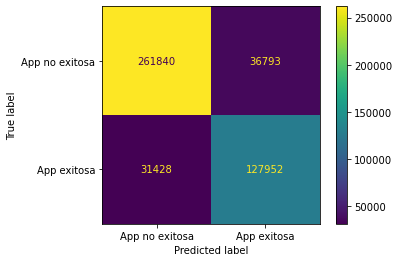

In [ ]:
plot_confusion_matrix(arbol_pre, X_test, y_test, display_labels= ['App no exitosa', 'App exitosa'])

Apps no exitosas

Fueron clasificadas 298.633 apps como no exitosas.

Fueron clasificadas correctamente 261.840 apps.

Fueron clasificadas incorrectamente 36.793 apps.

__________________________________________________

Apps exitosas

Fueron clasificadas 159.80 apps como exitosas. 

Fueron clasificadas correctamente 127.952 apps. 

Fueron clasificadas incorrectamente 31.428 apps. 



### Random Forest

C:\Users\alder\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.1s finished


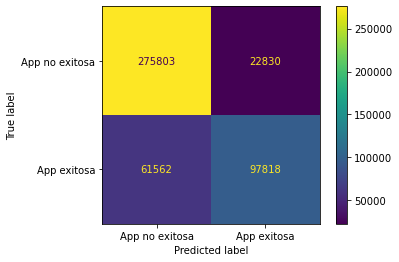

In [ ]:
plot_confusion_matrix(rf, X_test, y_test.values.ravel(), display_labels= ['App no exitosa', 'App exitosa'])

Apps no exitosas

Fueron clasificadas 298.633 apps como no exitosas.

Fueron clasificadas correctamente 275.803  apps.

Fueron clasificadas incorrectamente 22.830 apps.

__________________________________________________

Apps exitosas

Fueron clasificadas 159.380 apps como exitosas. 

Fueron clasificadas correctamente 97.818 apps. 

Fueron clasificadas incorrectamente 61.562 apps. 

_______________________________________________________

##### Se deben ajustar los parametros del modelo. (Usar GridSearchCV)


### Gausian Naive Bayes

C:\Users\alder\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


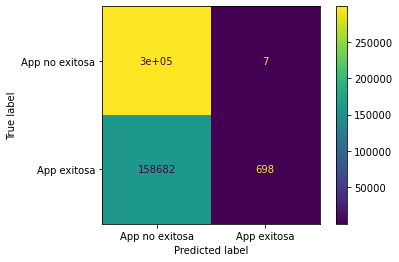

In [ ]:
plot_confusion_matrix(gnb, X_test, y_test, display_labels= ['App no exitosa', 'App exitosa'])

El modelo no clasifica correctamente segun la matriz de confusion.

# Curva ROC 

C:\Users\alder\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\alder\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.1s finished
C:\Users\alder\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87

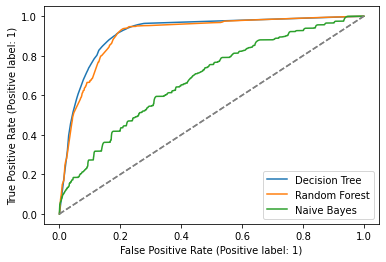

In [ ]:
#ROC curve 
##evaluando los modelos

#plot_roc_curve(arbol_pre, X_test, y_test) 

arbol_roc = metrics.plot_roc_curve(arbol_pre, 
                    X_test, 
                    y_test, 
                    label='Decision Tree')
rf_roc = metrics.plot_roc_curve(rf, 
                    X_test, 
                    y_test, 
                    ax=arbol_roc.ax_,
                    label='Random Forest')

gnb_roc = metrics.plot_roc_curve(gnb, 
                    X_test, 
                    y_test, 
                    ax=arbol_roc.ax_,
                    label='Naive Bayes')
plt.plot([(0,0), (1,1)], color='grey', linestyle='--')
plt.legend();

# Reportes

#### Decision Tree


In [ ]:
print('Decision Tree')
print(classification_report(y_test, arbol_pre.predict(X_test)))


Decision Tree
              precision    recall  f1-score   support

           0       0.89      0.88      0.88    298633
           1       0.78      0.80      0.79    159380

    accuracy                           0.85    458013
   macro avg       0.83      0.84      0.84    458013
weighted avg       0.85      0.85      0.85    458013



#### Random Forest 

In [ ]:
print('Random Forest')
print(classification_report(y_test, rf.predict(X_test)))


Random Forest


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.1s finished


              precision    recall  f1-score   support

           0       0.82      0.92      0.87    298633
           1       0.81      0.61      0.70    159380

    accuracy                           0.82    458013
   macro avg       0.81      0.77      0.78    458013
weighted avg       0.82      0.82      0.81    458013



#### Naive Bayes


In [ ]:
print('Naive Bayes')
print(classification_report(y_test, gnb.predict(X_test)))


Naive Bayes
              precision    recall  f1-score   support

           0       0.65      1.00      0.79    298633
           1       0.99      0.00      0.01    159380

    accuracy                           0.65    458013
   macro avg       0.82      0.50      0.40    458013
weighted avg       0.77      0.65      0.52    458013

